## Data Analysis on we rate dogs tweets

## Objectives:
1) Data gathering TASKS:
     
     1.Download twitter_archive_enhanced.csv manually
      
     2.Download programmatically image_predictions.tsv using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv , This has information what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network
     
     3.Gather each tweet's retweet count and favorite ("like") count at minimum, and any additional data we find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
 
2) Data Assessing TASKS:
     
     1.assess the gathered data visually and programmatically for quality and tidiness issues
     
     2.Detect and document at least eight (8) quality issues and two (2) tidiness issues

3) Data Cleaning:
    - Clean the issues identified, in data assessing process.
4) Data Analyzing:
    - Analyze the cleaned Data set.

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns


# Data Wrangling:

## Data Gathering:

### TASK 1: importing twitter archive enhanced csv file

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### TASK 2:

In [3]:
# imported twitter_archive_enhanced.csv manually
# Download programmatically image_predictions.tsv using the Requests library and the following URL: 
# https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [4]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [5]:
image_predictions_df = pd.read_csv("image_predictions.tsv", sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### TASK 3:

In [6]:
# Gather each tweet's retweet count and favorite ("like") count at minimum, and any additional data we find interesting. 
#Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and 
#store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line.
#Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
twitter_archive_df.tweet_id.unique().shape, twitter_archive_df.shape

((2356,), (2356, 17))

In [7]:
#Twitter API credentials
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

In [8]:
# lets connect with twitter api using credintials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
 
api = tweepy.API(auth)

In [9]:
twitter_archive_df.tweet_id[0]

892420643555336193

In [10]:
tw = api.get_status(id = "892420643555336193")._json

In [11]:
tw['id'], tw['retweet_count'], tw['favorite_count']

(892420643555336193, 8233, 37781)

- So our connection is succesfull and we are able to get data from api
- Lets import all the tweets data from API based on the tweets id, that we have from twitter_archive_df

In [12]:
tw

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


- As we can see from above each tweet will have a json file, which contains features information
- Since there are total 2356 tweet id's, we will have 2356 json files, unless the tweet was deleted.
- So lets gather all the tweet json files based on the id's and store them in a list, so that we can convert them into a dataframe, and use them in later data analysis process.

In [13]:
# storing all the tweet ids in one variable
archive_tweet_ids = twitter_archive_df.tweet_id.values

In [14]:
json_lists = []
no_tweet_ids = []
for co, t_ids in enumerate(archive_tweet_ids):
    if co%100 == 0:
        print(co, t_ids)
    try:
        #appending each tweets json file into a list 
        json_lists.append(api.get_status(t_ids)._json)
    except:
        # tweet id's which no longer exists in the API will be appended in no_tweet_ids
        no_tweet_ids.append(t_ids)

0 892420643555336193
100 872820683541237760
200 854010172552949760
300 836753516572119041
400 824775126675836928
500 813112105746448384
600 798673117451325440
700 786233965241827333
800 772615324260794368
900 758740312047005698
1000 747963614829678593
1100 735648611367784448
1200 716730379797970944
1300 707693576495472641
1400 699446877801091073
1500 692158366030913536
1600 686007916130873345
1700 680959110691590145
1800 676975532580409345
1900 674664755118911488
2000 672488522314567680
2100 670704688707301377
2200 668655139528511488
2300 667062181243039745


In [15]:
# number of tweet id's which no longer exists
print(len(no_tweet_ids))
no_tweet_ids

18


[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 755206590534418437,
 754011816964026368,
 680055455951884288]

- So there are total 18 archive tweet ID'S with no tweets based on the tweet id's

In [16]:
# Lets store all the list of json files locally
with open("tweet_json.txt", 'w', encoding="utf-8") as fd:
    json.dump(json_lists, fd)

In [17]:
# Lets create the pandas dataframe using all the json files
tweet_features_df = pd.read_json("tweet_json.txt")
tweet_features_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37781,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8233,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,32456,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,6084,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,24435,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4027,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41113,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8382,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,39321,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9089,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [18]:
np.intersect1d(twitter_archive_df.tweet_id, tweet_features_df.id).shape

(2338,)

- So there are 2339 tweets common between twitter_archive_df and tweet_features_df

## Data Assessing

## TASKS:
     1.assess the gathered data visually and programmatically for quality and tidiness issues
     2.Detect and document at least eight (8) quality issues and two (2) tidiness issues

In [19]:
# So we have twitter_archive_df, image_predictions_df, tweet_features_df
# lets see first five rows of all the data frames
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### DATA Structural ISSUES:
 1) As we can see the data frame, contains doggo, floofer, pupper an puppo features, As all these features can be treated as a single radom variable dog catogories we don't need 4 features, one feature with name dog_type is enough
 
 2) There are total 3 dataframes and one data frame is suffice for our analysis.

In [20]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

 ### DATA QUALITY ISSUES:
 1)  According to problem statement rating numerator will always have values greater than or equal to 10, But we can see that some of the observations have rating numerators less that 10 also.
 
 2) According to problem statement rating denominator will always be 10, But we can see that some of the observations have rating denominator other than 10.

In [22]:
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [23]:
def non_null_detector(df_name, column_names_list):
    '''
    This function takes dataframe name and column names as input 
    and prints what percentage of non null values 
    that particular columns has in the whole dataframe
    
    parameters:
    column_names_list: this value should be list of column names in a dataframe
    df_name: name of the dataframe
    '''
    no_obs = df_name.shape[0]
    for col in column_names_list:
        sum_non_null = df_name[col].value_counts().sum()
        print('{} has {}% non null values'.format(col, (sum_non_null/no_obs)*100))

In [24]:
non_null_detector(twitter_archive_df, twitter_archive_df.columns)

tweet_id has 100.0% non null values
in_reply_to_status_id has 3.3106960950764006% non null values
in_reply_to_user_id has 3.3106960950764006% non null values
timestamp has 100.0% non null values
source has 100.0% non null values
text has 100.0% non null values
retweeted_status_id has 7.6825127334465195% non null values
retweeted_status_user_id has 7.6825127334465195% non null values
retweeted_status_timestamp has 7.6825127334465195% non null values
expanded_urls has 97.49575551782682% non null values
rating_numerator has 100.0% non null values
rating_denominator has 100.0% non null values
name has 100.0% non null values
doggo has 100.0% non null values
floofer has 100.0% non null values
pupper has 100.0% non null values
puppo has 100.0% non null values


### DATA QUALITY ISSUES:
 3) column in_reply_to_status_id has only 3.31% non null values
 
 4) column in_reply_to_user_id has only 3.31% non null values
 
 5) retweeted_status_id has only 7.6825127334465195% non null values
 
 6) retweeted_status_timestamp has 7.6825127334465195% non null values 
 
 7) Fortunately the above columns which has more null values are not required for our analysis.
 
 8) Name column has 745 missing values showing as 'None' and some illogical dog names like a, an the, etc
 
 9) Dataset contains some retweets observations

In [25]:
twitter_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Toby            7
Buddy           7
Bailey          7
Daisy           7
an              7
Koda            6
Stanley         6
Bella           6
Scout           6
Jax             6
Oscar           6
Leo             6
Jack            6
Dave            6
Milo            6
Rusty           6
Finn            5
             ... 
Crouton         1
Tess            1
Kody            1
Clarkus         1
Zuzu            1
Thor            1
Longfellow      1
Jeb             1
Kaiya           1
Bonaparte       1
Naphaniel       1
Emmie           1
Huxley          1
Comet           1
Dale            1
Hamrick         1
Gabby           1
Maxwell         1
Combo           1
Bowie           1
Jessiga         1
Claude          1
Sephie          1
life            1
Linus     

In [26]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### DATA QUALITY ISSUES:
 10) timestamp column is of object type, Also we can change timestamp name as tweet_time to make more sense.

 #### Now lets assess image_predictions_df

In [27]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
image_predictions_df.jpg_url.shape, twitter_archive_df.shape

((2075,), (2356, 17))

### DATA QUALITY ISSUES:
 11) As per the problem statement we will do analysis on tweets which has images, since only 2075 tweets out of 2356 tweets only has images, we will do analysis only on these tweeets

In [29]:
# Lets see if there are any null values present in the image_predictions_df 
non_null_detector(image_predictions_df, image_predictions_df.columns)

tweet_id has 100.0% non null values
jpg_url has 100.0% non null values
img_num has 100.0% non null values
p1 has 100.0% non null values
p1_conf has 100.0% non null values
p1_dog has 100.0% non null values
p2 has 100.0% non null values
p2_conf has 100.0% non null values
p2_dog has 100.0% non null values
p3 has 100.0% non null values
p3_conf has 100.0% non null values
p3_dog has 100.0% non null values


- As we can see there no null values in image_predictions dataframe
- Lets assess whether there are any outliers in features

In [30]:
# according to problem statement image_num should only between 1 and 4
print(image_predictions_df.img_num.value_counts())

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64


- so img_num doesn't have any outliers
- According to problem statement p1_conf, p2_conf, p3_conf features should lie between 0 and 1
- Lets see if there are any outliers present in p1_conf, p2_conf, p3_conf

In [31]:
print(image_predictions_df.query('(p1_conf > 1) or (p1_conf < 0)'))
print(image_predictions_df.query('(p2_conf > 1) or (p2_conf < 0)'))
print(image_predictions_df.query('(p3_conf > 1) or (p3_conf < 0)'))

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []
Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []
Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []


- So p1_conf, p2_conf, p3_conf doesn't have any outliers

In [32]:
# Below features should have either True or False values, lets check them.
print(image_predictions_df.p1_dog.value_counts(), "\n")
print(image_predictions_df.p2_dog.value_counts(), "\n")
print(image_predictions_df.p3_dog.value_counts(), "\n")

True     1532
False     543
Name: p1_dog, dtype: int64 

True     1553
False     522
Name: p2_dog, dtype: int64 

True     1499
False     576
Name: p3_dog, dtype: int64 



In [33]:
image_predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

#### lets assess tweeet_features_df

In [34]:
tweet_features_df.sample(4)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
431,NaN,NaN,2017-01-12 16:54:26,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819588347551064066, 'id_str'...",10116,False,NaN,819588359383371776,819588359383371776,...,NaN,NaN,NaN,2132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
428,NaN,NaN,2017-01-13 17:00:21,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,5614,False,NaN,819952236453363712,819952236453363712,...,NaN,NaN,NaN,1278,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1395,NaN,NaN,2016-02-14 19:35:46,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698953792398692352, 'id_str'...",2811,False,NaN,698953797952008193,698953797952008192,...,NaN,NaN,NaN,956,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet CeCe. She wanted to take a selfie before ...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2032,NaN,NaN,2015-12-01 01:14:35,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671497582414307329, 'id_str'...",925,False,NaN,671497587707535361,671497587707535360,...,NaN,NaN,NaN,453,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [35]:
tweet_features_df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [36]:
tweet_features_df.favorited.unique(), tweet_features_df.geo.unique()

(array([False]), array([nan]))

In [37]:
tweet_features_df.retweet_count.unique()

array([8233, 6084, 4027, ...,  138,  829,   42], dtype=int64)

In [38]:
tweet_features_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2204
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [39]:
tweet_features_df.truncated.value_counts()

False    2092
True      246
Name: truncated, dtype: int64

- So 246 tweets are truncated

In [40]:
tweet_features_df.retweeted.unique()

array([False])

In [41]:
tweet_features_df.user[0]['id']

4196983835

In [42]:
# checking whethere all the tweets belong to same user '4196983835' weratedogs
not_weratedogs = []
for dind, di in enumerate(tweet_features_df.user):
    if di['id'] != 4196983835:
        not_weratedogs.append(dind, di['id'])

In [43]:
not_weratedogs

[]

- So, all the tweets belong to same user.

In [44]:
tweet_features_df.user[0]['id'] == 4196983835

True

In [45]:
tweet_features_df['retweeted'].value_counts()

False    2338
Name: retweeted, dtype: int64

- tweet_features_df contains several columns which are not neccessary for our analysis like contributors, cordinates, entities favorited, nan
- tweet_features_df contains important features like favorite_count, retweet_count.

## Data Cleaning

In [46]:
# Storing the original datframes before cleaning
archive_df = twitter_archive_df.copy()
image_df = image_predictions_df.copy()
tweet_info_df = tweet_features_df.copy()

In [47]:
archive_df.shape, image_df.shape, tweet_info_df.shape

((2356, 17), (2075, 12), (2338, 30))

In [48]:
np.intersect1d(archive_df.tweet_id, image_df.tweet_id).shape

(2075,)

In [49]:
# ISSUE : Some tweets doesn't have images
# Define: To solve this issue, lets join image_df and archive_df on tweet_id so that we will have all the tweets with jpg_url
# Code:
final_df = image_df.merge(archive_df, on='tweet_id', how='inner')
final_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [50]:
# Test: testing whether every tweet has corresponding jpg_url
final_df.jpg_url.value_counts().sum(), final_df.shape[0]

(2075, 2075)

In [51]:
tweet_info_df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [52]:
# ISSUE: tweet_info_df has several unneccessary columns for our analysis
# DEFINE: Storing the required columns in a variable, and getting a dataframe with only required features
# CODE: 
required_features = ['id','favorite_count', 'retweet_count', 'retweeted']
tweet_info_df = tweet_info_df[required_features]

In [53]:
#TEST:
tweet_info_df.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37781,8233,False
1,892177421306343426,32456,6084,False
2,891815181378084864,24435,4027,False
3,891689557279858688,41113,8382,False
4,891327558926688256,39321,9089,False


In [54]:
tweet_info_df.favorite_count.value_counts().sum()

2338

In [55]:
# lets see how many tweet id's are common in both tweet_info_df and final_df
np.intersect1d(final_df.tweet_id, tweet_info_df.id).shape

(2065,)

In [56]:
# ISSUE: STRUCTURAL ISSUE One dataframe is enough for our analysis
# DEFINE: lets combine final_df with tweet_info_df on tweet id's
#CODE: 
final_df = final_df.merge(tweet_info_df, left_on='tweet_id', right_on='id', how='inner')

In [57]:
# Test:
final_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,rating_denominator,name,doggo,floofer,pupper,puppo,id,favorite_count,retweet_count,retweeted
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,10,None,None,None,None,None,666020888022790149,2523,498,False
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,10,a,None,None,None,None,666029285002620928,125,46,False
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,10,a,None,None,None,None,666033412701032449,122,43,False
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,10,a,None,None,None,None,666044226329800704,290,136,False
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,10,None,None,None,None,None,666049248165822465,105,42,False


In [58]:
final_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'id', 'favorite_count', 'retweet_count', 'retweeted'],
      dtype='object')

In [59]:
# ISSUE: Removing all the observations that has retweet and reply status
# DEFINE: Explore the features which belongs to retweet and reply and delete observations belong to these features
# CODE:
print(final_df.in_reply_to_status_id.value_counts().sum())
print(final_df.in_reply_to_user_id.value_counts().sum())
print(final_df.retweeted_status_id.value_counts().sum())
print(final_df.retweeted_status_user_id.value_counts().sum())
print((final_df.id == final_df.tweet_id).sum() == final_df.shape[0])

23
23
75
75
True


In [60]:
final_df = final_df[final_df.retweeted_status_id.isnull()]

In [61]:
final_df = final_df[final_df.in_reply_to_status_id.isnull()]
# TEST:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2064
Data columns (total 32 columns):
tweet_id                      1967 non-null int64
jpg_url                       1967 non-null object
img_num                       1967 non-null int64
p1                            1967 non-null object
p1_conf                       1967 non-null float64
p1_dog                        1967 non-null bool
p2                            1967 non-null object
p2_conf                       1967 non-null float64
p2_dog                        1967 non-null bool
p3                            1967 non-null object
p3_conf                       1967 non-null float64
p3_dog                        1967 non-null bool
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1967 non-null object
source                        1967 non-null object
text                          1967 non-null object
retweeted_status_id           0 non

- Hence deleted all the observations belonging to retweet and reply tweets.
- Lets now remove all the unnecessary observations.

In [62]:
final_df.tweet_id[0], final_df.expanded_urls[0]

(666020888022790149,
 'https://twitter.com/dog_rates/status/666020888022790149/photo/1')

In [64]:
# DEFINE
# From above we can see tweet id is present both in tweet_id feature aswell as expanded_url
# Both thse should match, if our tweet_id and expanded_urls belong to same tweet.
# Lets check whether they are same.

In [65]:
# Code:
url_tweet_id = []
for _ in final_df.expanded_urls:
    url_tweet_id.append(int(_.split('/')[-3]))

In [66]:
# TEST:
(url_tweet_id == final_df.tweet_id).sum(), final_df.shape[0]

(1967, 1967)

In [67]:
final_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'id', 'favorite_count', 'retweet_count', 'retweeted'],
      dtype='object')

In [68]:
# lets check whether the id and tweet_ids duplicate
# So we romove, id as it is a duplicated of tweet_id feature
(final_df.tweet_id == final_df.id).sum()

1967

In [69]:
# As we have already deleted all the tweets belong to retweeted we can remove this feature too.
final_df.retweeted.sum()

0

In [70]:
# DEFINE: Removing all unnecessary columns
# CODE: Lets store all the unnecessary columns in a variable and remove them from the dataframe.
del_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'id', 'retweeted']

In [73]:
final_df = final_df.drop(del_col, axis=1)
# TEST: 
final_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,2523,498
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,125,46
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,122,43
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,290,136
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,105,42


In [74]:
final_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'favorite_count',
       'retweet_count'],
      dtype='object')

In [75]:
# STRUCTURAL ISSUE: 'doggo', 'floofer', 'pupper', 'puppo' can be accomodated to single variable with name dog types
# DEFINE: EXTRACT THE DOG TYPE FROM TWEET TEXT AND REPLACE ALL THE ABOVE 4 COLUMNS WITH SINGLE COLUMN, dog_types
# CODE:
print(final_df.doggo.value_counts(), '\n')
print(final_df.floofer.value_counts(), '\n')
print(final_df.pupper.value_counts(), '\n')
print(final_df.puppo.value_counts())

None     1895
doggo      72
Name: doggo, dtype: int64 

None       1959
floofer       8
Name: floofer, dtype: int64 

None      1758
pupper     209
Name: pupper, dtype: int64 

None     1944
puppo      23
Name: puppo, dtype: int64


In [76]:
dog_types = (final_df.text.str.lower()).str.extract('(puppo|pupper|floofer|doggo)', expand=True)[0]
dog_types.value_counts()

pupper     228
doggo       73
puppo       29
floofer      7
Name: 0, dtype: int64

In [77]:
final_df['dog_types'] = dog_types
final_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,dog_types
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,8,10,None,None,None,None,None,2523,498,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,7,10,a,None,None,None,None,125,46,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,9,10,a,None,None,None,None,122,43,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,6,10,a,None,None,None,None,290,136,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,5,10,None,None,None,None,None,105,42,NaN


In [82]:
# AS WE HAVE ADDED DOG TYPES FEATURE, LETS DELETE DOGGO, FLOOFER, PUPPER, PUPPO
final_df = final_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
final_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_types
1235,746726898085036033,https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg,1,golden_retriever,0.256505,True,Labrador_retriever,0.252417,True,seat_belt,...,False,2016-06-25 15:29:00 +0000,Meet Abby. She's incredibly distracting. Just ...,https://twitter.com/dog_rates/status/746726898...,12,10,Abby,6295,1902,NaN
1995,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,...,True,2017-06-21 00:06:44 +0000,Meet Dante. At first he wasn't a fan of his ne...,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,26767,5054,NaN
1496,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,Lakeland_terrier,0.265659,True,golden_retriever,0.196414,True,standard_poodle,...,True,2016-10-06 00:08:09 +0000,This is Mairi. She has mastered the art of cam...,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,7799,2120,NaN
1192,740214038584557568,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,...,True,2016-06-07 16:09:13 +0000,This is getting incredibly frustrating. This i...,https://twitter.com/dog_rates/status/740214038...,10,10,getting,6950,2079,NaN
2056,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,...,True,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,27163,4142,NaN


In [84]:
final_df.dog_types.value_counts()

pupper     228
doggo       73
puppo       29
floofer      7
Name: dog_types, dtype: int64

In [91]:
final_df.text[210]

"This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK"

In [90]:
final_df.dog_types[210]

'pupper'

In [92]:
# ISSUE: Outliers in rating denominator
# Define: rating denominator is always 10, Replace the feature value with 10
# CODE:
final_df.rating_denominator = 10
# TEST:
final_df.rating_denominator.unique()

array([10], dtype=int64)

In [93]:
# # ISSUE: RATING NUMERATOR CAN'T BE LESS THAN 10 ACCORDING TO PROBLEM STATEMETN
# Define: EXPLORE THE RATING NUMERATOR VALUES, AND CHECK WHETHER THESE VALUES REALLY OUTLIERS BY GOING TO WEBSITE 
# USING EXTENDED URL FEATURE
# CODE:
(final_df.rating_numerator < 10).sum()

412

In [94]:
# our first tweet itself has the rating numerator less than 10(8)
# lets see its tweets page, and check the numerator value.
final_df.rating_numerator[0], final_df.expanded_urls[0]

(8, 'https://twitter.com/dog_rates/status/666020888022790149/photo/1')

In [113]:
# ISSUE: datetime feature is object type
# DEFINE: convert object type to date time type and rename the datetime to tweet_time.
# CODE:
pd.to_datetime(final_df.timestamp).dt.date[:4]

0    2015-11-15
1    2015-11-15
2    2015-11-15
3    2015-11-16
Name: timestamp, dtype: object

In [132]:
type(final_df.tweet_time[0])

datetime.date

In [114]:
final_df.timestamp = pd.to_datetime(final_df.timestamp).dt.date
final_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_types
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2015-11-15,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,2523,498,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,True,2015-11-15,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,125,46,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,2015-11-15,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,122,43,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,2015-11-16,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,290,136,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,True,2015-11-16,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,105,42,NaN


In [119]:
final_df = final_df.rename({'timestamp':'tweet_time'}, axis=1)
# TEST:
final_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,tweet_time,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_types
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2015-11-15,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,2523,498,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,True,2015-11-15,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,125,46,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,2015-11-15,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,122,43,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,2015-11-16,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,290,136,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,True,2015-11-16,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,105,42,NaN


In [130]:
# ISSUE: CONVERTING tweet_id type to string object.
# DEFINE: CONVERT WHOLE SERIES TO STR TYPE
# CODE: 
final_df.tweet_id = final_df.tweet_id.astype(str)
# TYPE:
type(final_df.tweet_id)

pandas.core.series.Series

In [131]:
type(final_df.tweet_id[0])

str

In [219]:
# lETS STORE OUR final_df to a csv file so that we can work later
final_df.to_csv("final_wrangled_df.csv", index=False)

## Analysis:

In [134]:
final_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,tweet_time,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_types
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2015-11-15,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,2523,498,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,True,2015-11-15,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,125,46,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,2015-11-15,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,122,43,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,2015-11-16,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,290,136,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,True,2015-11-16,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,105,42,NaN


### [Q]  Lets see whether dogs which has higher rating numerators are more liked. 
- As we know that the rating denominator is constant.
- We can take rating numerator as performance metric.
- Lets see whether based on the favorite count and retweet count, we can tell whether the dog is more liked or not.

In [135]:
model_df = final_df[['tweet_id', 'rating_numerator', 'favorite_count',\
                     'retweet_count', 'name', 'dog_types', 'tweet_time']]

In [136]:
model_df.head()

,tweet_id,rating_numerator,favorite_count,retweet_count,name,dog_types,tweet_time
0,666020888022790149,8,2523,498,None,NaN,2015-11-15
1,666029285002620928,7,125,46,a,NaN,2015-11-15
2,666033412701032449,9,122,43,a,NaN,2015-11-15
3,666044226329800704,6,290,136,a,NaN,2015-11-16
4,666049248165822465,5,105,42,None,NaN,2015-11-16


In [137]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2064
Data columns (total 7 columns):
tweet_id            1967 non-null object
rating_numerator    1967 non-null int64
favorite_count      1967 non-null int64
retweet_count       1967 non-null int64
name                1967 non-null object
dog_types           337 non-null object
tweet_time          1967 non-null object
dtypes: int64(3), object(4)
memory usage: 202.9+ KB


In [138]:
model_df.corr()

,rating_numerator,favorite_count,retweet_count
rating_numerator,1.000000,0.016733,0.018891
favorite_count,0.016733,1.000000,0.929779
retweet_count,0.018891,0.929779,1.000000


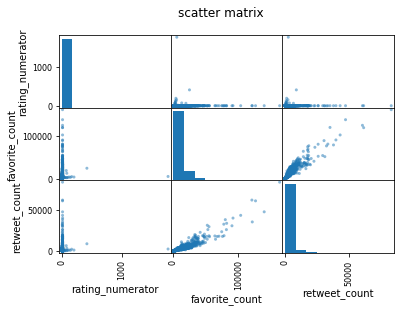

In [162]:
pd.plotting.scatter_matrix(model_df);
plt.suptitle('scatter matrix');

### observations:
- There doesn't exisxt's a great correlation between favorite count and rating numerator only 0.016.
- Also the corelation between rating_numerator and retweet_count is also pretty low 0.0188.
- Interestingly corelation between favorite count and retweet count is pretty high 0.929.

In [139]:
model_df.describe()

,rating_numerator,favorite_count,retweet_count
count,1967.000000,1967.000000,1967.000000
mean,12.223183,8707.332486,2642.418404
std,41.676313,12769.801532,4712.234607
min,0.000000,77.000000,11.000000
25%,10.000000,1871.500000,589.000000
50%,11.000000,3933.000000,1271.000000
75%,12.000000,10857.000000,3015.000000
max,1776.000000,163129.000000,82968.000000


- From above we can 75% of rating_numerators lies below 12.0
- But the max value of rating numerator is 1776.0 which is very high.
- Lets see whether its a genuine case or outlier.

In [142]:
model_df[model_df.rating_numerator == model_df.rating_numerator.max()]

,tweet_id,rating_numerator,favorite_count,retweet_count,name,dog_types,tweet_time
1269,749981277374128128,1776,5344,2611,Atticus,NaN,2016-07-04


In [150]:
max_num_df = final_df[final_df.tweet_id == str(749981277374128128)]

In [151]:
max_num_df.expanded_urls

1269    https://twitter.com/dog_rates/status/749981277...
Name: expanded_urls, dtype: object

- Since the above link is not working lets see some other details obout the dog, and why it received max numerator rating.

In [148]:
from IPython.display import Image
from IPython.core.display import HTML

In [157]:
print(max_num_df.text.iloc[0])
Image(url="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


### Observations:
- Numerator rating is not an outlier.
- Indeed the dog(atticus) has received max numerical rating.
- Looks like this dog has history, and so many replies reveils that atticus is related to america's nation pride.
- The same thing, we can see in atticus pic, which is wearing US flag.

### [Q] Whether the problem statement about rating numerator is correct.
Problem statemet about rating numerator and I quote below

" These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."

- So according to problem statement rating numerator almost always greater than 10.
- Lets see whether the rating numerator is always above 10, and if not which cases, its failing.

In [166]:
model_df[model_df.rating_numerator < 10].rating_numerator.value_counts().sum()

412

- As we can see there are 412 dogs with less than 10 rating, lets see why is this so.

In [168]:
low_numer_df = model_df[model_df.rating_numerator < 10]
low_numer_df.sample(5)

,tweet_id,rating_numerator,favorite_count,retweet_count,name,dog_types,tweet_time
473,675146535592706048,7,1213,325,Coops,NaN,2015-12-11
1195,740373189193256964,9,36207,14074,None,NaN,2016-06-08
660,682429480204398592,8,3577,1239,None,NaN,2015-12-31
347,672475084225949696,8,1444,715,Buddy,NaN,2015-12-03
80,667455448082227200,7,190,60,Reese,NaN,2015-11-19


In [170]:
low_numer_df.rating_numerator.value_counts()

9    150
8     95
7     52
5     33
6     32
3     19
4     16
2      9
1      5
0      1
Name: rating_numerator, dtype: int64

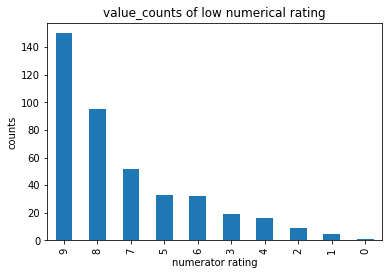

In [174]:
low_numer_df.rating_numerator.value_counts().plot(kind = 'bar');
plt.xlabel("numerator rating")
plt.ylabel("counts")
plt.title("value_counts of low numerical rating");

- From above we can see that there is one dog with numerical rating zero.
- 5 dogs with numerical rating 1.
- 9 dogs with numerical rating 2
- 150 dogs with numerical rating 9.
### Observation: 
- These clearly shows that our problem statement about numerical rating is wrong.
- Indeed There are dogs with numerical rating less than 10.

In [183]:
pd.set_option('display.max_colwidth', -1)

In [190]:
final_df.query("rating_numerator < 3")[['tweet_id','text','jpg_url','rating_numerator','name']].sample(10)['text']

29     This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t
429    This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ  
272    Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT 
573    This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz
260    Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO    
17     Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX      
45     Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Ba

In [207]:
less_than_3_ratings = final_df.query("rating_numerator < 3")[['tweet_id','jpg_url','rating_numerator','p1','text']]

In [208]:
less_than_3_ratings

,tweet_id,jpg_url,rating_numerator,p1,text
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,2,box_turtle,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,2,coho,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,2,snail,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S
93,667549055577362432,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,electric_fan,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,2,seat_belt,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,2,Angora,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
272,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,2,scorpion,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT"


In [212]:
def path_to_image_html(path):
    '''
     This function essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 
    '''

    return '<img src="'+ path + '" style=height:124px;width:124px;"/>'

In [213]:
html_im = less_than_3_ratings.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html))

In [214]:
HTML(html_im)

,tweet_id,jpg_url,rating_numerator,p1,text
6,666051853826850816,,2,box_turtle,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
17,666104133288665088,,1,hen,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX
20,666287406224695296,,1,Maltese_dog,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
29,666411507551481857,,2,coho,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t
45,666786068205871104,,2,snail,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S
93,667549055577362432,,1,electric_fan,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
108,667878741721415682,,2,seat_belt,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&2/10 https://t.co/LvP1TTYSCN
117,668142349051129856,,2,Angora,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2
260,670783437142401025,,1,lacewing,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
272,670826280409919488,,2,scorpion,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT"


In [216]:
seven_ratings = final_df.query("rating_numerator == 7")[['tweet_id','jpg_url','rating_numerator','p1','text']]
html_im_7 = seven_ratings.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html))

In [217]:
HTML(html_im_7)

,tweet_id,jpg_url,rating_numerator,p1,text
1,666029285002620928,,7,redbone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
28,666407126856765440,,7,black-and-tan_coonhound,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h
32,666428276349472768,,7,Pembroke,Here we have an Austrian Pulitzer. Collectors edition. Levitates (?). 7/10 would garden with https://t.co/NMQq6HIglK
35,666437273139982337,,7,Chihuahua,Here we see a lone northeastern Cumberbatch. Half ladybug. Only builds with bricks. Very confident with body. 7/10 https://t.co/7LtjBS0GPK
58,667090893657276420,,7,Chihuahua,This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10 https://t.co/Ks0jZtdIrr
75,667405339315146752,,7,Saint_Bernard,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1
80,667455448082227200,,7,Tibetan_terrier,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK
82,667491009379606528,,7,borzoi,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y
96,667724302356258817,,7,ibex,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ
119,668171859951755264,,7,Chihuahua,This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb


In [218]:
model_df.to_csv("model_df.csv", index=False)

### Observations:
1. As we can see out of 15 tweets which has less than 3 ratings, 13 images are not even dogs.
2. So we can say most of the tweets which got less than 10 rating either doesnot belong to dog, or the dog has some problems like blind, deaf, some even are cars, sunflowers etc.
3. We can't comment that every tweet is like that but most of tweets are like that.

## Conclusion:
1. Gathered data from three sources, tweets information from twitter api, image data from image_predictions.tsv and text info form twitter-archive-enhanced.csv.
2. Assess the dataset and found data quality and and data structure issues.
3. Cleaned all the data quality and strutural issues in data cleaning section.
4. After cleaning the dataset analyzed the dataset and found out the following observations.
5. There doesn't exist's a great correlation between favorite count and rating numerator only 0.016.
6. Also the corelation between rating_numerator and retweet_count is also pretty low 0.0188.
7. corelation between favorite count and retweet count is pretty high 0.929.
8. Indeed the dog(atticus) has received max numerical rating of 1776.
9. Looks like this dog has history, and so many replies reveils that atticus is related to america's nation pride.
The same thing, we can see in atticus pic, which is wearing US flag.
10. according to problem statement rating numerator almost always greater than 10, but according to our observations there are 412 dogs with less than 10 numerator ratings.
11.  we can see out of 15 tweets which has less than 3 ratings, 13 images are not even dogs.
12. So we can say most of the tweets which got less than 10 rating either doesnot belong to dog, or the dog has some problems like blind, deaf, some even are cars, sunflowers etc.
13. We can't comment that every tweet with less than 10 are not dogs but we can say most of them. and further analysis is required to get more info.